<a href="https://colab.research.google.com/github/gmazzitelli/GSN2/blob/master/AnagraficheCSN2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Analisi Anagrafiche CSN2

In [7]:
# 
# data source https://reportgodiva.dsi.infn.it/ per anagrafiche
# data source https://dbprogetti.dsi.infn.it/dbprogetti/listaProgettiFE per progetti su fondi esterni
# https://drive.google.com/file/d/1pTju26izsWDAd90vn80qEyNbfnC5Q9Oh/
# 
def load_from_gspreadsheet(key, sheet_name):
    # google spredsheet TO url 
    # url = "https://docs.google.com/spreadsheet/ccc?key="+key+"&output=csv&sheet={Sheet2}"
    url = 'https://docs.google.com/spreadsheets/d/{key}/gviz/tq?tqx=out:csv&sheet={sheet_name}&headers=1'.format(
        key=key, sheet_name=sheet_name.replace(' ', '%20'))
    print(url)
    return url
def sp2pd(key, sheet_name, verbose=False):
    # spreadsheet TO Panda
    import pandas as pd
    df = pd.read_csv(load_from_gspreadsheet(key, sheet_name))
    # df = df[df.File_Number.isnull() == False]
    df.fillna('', inplace=True)
    if verbose: print ('Variables: ', df.columns.values)
    return df
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
plt.style.use('fast')
plt.rc('font', size = 14, family ='Sans-Serif')

In [8]:
INFN = sp2pd(key='1pTju26izsWDAd90vn80qEyNbfnC5Q9Oh', sheet_name='INFN')
# sosrtuire con CSN* per vedere le altre CSN (attaulente c''e' solo la 1)
CSN2 = sp2pd(key='1pTju26izsWDAd90vn80qEyNbfnC5Q9Oh', sheet_name='CSN2')
FE_INFN = sp2pd(key='1pTju26izsWDAd90vn80qEyNbfnC5Q9Oh', sheet_name='FE_INFN')
ASS = sp2pd(key='1pTju26izsWDAd90vn80qEyNbfnC5Q9Oh', sheet_name='ASS')

https://docs.google.com/spreadsheets/d/1pTju26izsWDAd90vn80qEyNbfnC5Q9Oh/gviz/tq?tqx=out:csv&sheet=INFN&headers=1
https://docs.google.com/spreadsheets/d/1pTju26izsWDAd90vn80qEyNbfnC5Q9Oh/gviz/tq?tqx=out:csv&sheet=CSN2&headers=1
https://docs.google.com/spreadsheets/d/1pTju26izsWDAd90vn80qEyNbfnC5Q9Oh/gviz/tq?tqx=out:csv&sheet=FE_INFN&headers=1
https://docs.google.com/spreadsheets/d/1pTju26izsWDAd90vn80qEyNbfnC5Q9Oh/gviz/tq?tqx=out:csv&sheet=ASS&headers=1


In [9]:
CSN2

,Cognome,Nome,Eta',Genere,Contratti,Esperimenti,Finanziamenti Contratto
0,Acerbi,Fabio,36,M,(01/01/2020 - 31/12/2020) Associato Scientific...,30% - (TIFP:CSN2) DARKSIDE (Ricercatore),
1,Acernese,Fausto,45,M,(01/01/2020 - 31/12/2020) Associato Incarico d...,20% - (NA:CSN2) ET_ITALIA (Ricercatore)\n 80%...,
2,Addazi,Andrea,31,M,(15/01/2020 - 31/12/2020) Associato Scientific...,40% - (ROMA2:CSN2) DAMA (Ricercatore),
3,Addesso,Paolo,45,M,(01/01/2020 - 31/12/2020) Associato Tecnologic...,20% - (SA:CSN2) VIRGO (Ricercatore),
4,Adriani,Oscar,55,M,(01/01/2020 - 31/12/2020) Associato Incarico d...,70% - (FI:CSN2) HERD_DMP (Ricercatore),
...,...,...,...,...,...,...,...
1586,Zendri,Jean Pierre,57,M,(14/02/1997 - nessuna scad.) Dipendente Primo ...,40% - (PD:CSN2) ET_ITALIA (Ricercatore)\n 60%...,
1587,Zichichi,Antonino,90,M,(01/01/2020 - 31/12/2020) Associato Incarico d...,0% - (BO:CSN2) AMS2 (Ricercatore)\n 0% - (BO:...,
1588,Zuccarello,Francesca,66,F,(01/01/2020 - 31/12/2020) Associato Scientific...,20% - (CT:CSN2) AUGER (Ricercatore)\n 30% - (...,
1589,Zucchelli,Stefano,66,M,(01/01/2020 - 31/12/2020) Associato Incarico d...,30% - (BO:CSN2) CUORE (Ricercatore)\n 10% - (...,


In [10]:
FE_INFN

,PROGETTO,CNS,DAL,AL,PROROGA,GRANT INFN,TOTALE BUDGET,PROJECT GRANT TOTALE
0,PRIN-10_GEMME,2,01/06/13,01/02/16,31/03/20,50'000.00,1'000'000.00,1'000'000.00
1,PRIN-2015L33WAK_002,2,12/03/20,19/03/30,15/04/20,2'000.00,1'234.00,
2,PRIN-2015P5SBHT_002,4,07/02/17,06/02/20,,75'000.00,,
3,UE-3DSPIN,4,01/07/15,30/06/20,,315'000.00,1'509'000.00,1'509'000.00
4,UE-4DPHOTON,1,01/12/19,30/11/24,,658'750.00,1'975'000.00,1'975'000.00
...,...,...,...,...,...,...,...,...
551,POR-WE_LIGHT,5,,29/06/21,,69'361.39,835'082.90,
552,UE-WENMR,5,01/11/10,31/10/13,,363'250.00,2'150'000.00,2'433'988.00
553,UE-WEST_LIFE,7,01/11/15,01/11/18,,344'000.00,3'981'125.00,3'981'125.00
554,ALTRO-XIPE,5,01/01/18,01/01/30,,195'600.00,,


Anagrafica

In [11]:
dipendenti   = pd.DataFrame(columns = CSN2.columns)
d_dottorandi = pd.DataFrame(columns = CSN2.columns) 
d_borsisti   = pd.DataFrame(columns = CSN2.columns) 
d_assegnisti = pd.DataFrame(columns = CSN2.columns) 
d_tecnici    = pd.DataFrame(columns = CSN2.columns) 
associati    = pd.DataFrame(columns = CSN2.columns) 
a_dottorandi = pd.DataFrame(columns = CSN2.columns) 
a_borsisti   = pd.DataFrame(columns = CSN2.columns) 
a_assegnisti = pd.DataFrame(columns = CSN2.columns) 
a_tecnici    = pd.DataFrame(columns = CSN2.columns) 
altro        = pd.DataFrame(columns = CSN2.columns)
for i, contratto in enumerate(CSN2.Contratti):
  if contratto == '' and not (contratto.find('Dipendente')>=0 or contratto.find('Associato')>=0):
    altro = altro.append(CSN2.iloc[i], ignore_index=True)
  if contratto.find('Dipendente')>=0:
    dipendenti = dipendenti.append(CSN2.iloc[i], ignore_index=True)
    if contratto.find('Dottorando')>=0:
      d_dottorandi = d_dottorandi.append(CSN2.iloc[i], ignore_index=True)
    if contratto.find('Borsista')>=0:
      d_borsisti = d_borsisti.append(CSN2.iloc[i], ignore_index=True)
    if contratto.find('Assegnista')>=0:
      d_assegnisti = d_assegnisti.append(CSN2.iloc[i], ignore_index=True)
    if contratto.find('Tecnico')>=0:
      d_tecnici = d_tecnici.append(CSN2.iloc[i], ignore_index=True)

  if contratto.find('Associato')>=0:
    associati = associati.append(CSN2.iloc[i], ignore_index=True)
    if contratto.find('Dottorando')>=0:
      a_dottorandi = a_dottorandi.append(CSN2.iloc[i], ignore_index=True)
    if contratto.find('Borsista')>=0:
      a_borsisti = a_borsisti.append(CSN2.iloc[i], ignore_index=True)
    if contratto.find('Assegnista')>=0:
      a_assegnisti = a_assegnisti.append(CSN2.iloc[i], ignore_index=True)
    if contratto.find('Tecnico')>=0:
      a_tecnici = a_tecnici.append(CSN2.iloc[i], ignore_index=True)

print ('Popolazione: ', len(CSN2),'\n',
       'Dipendenti: ', len(dipendenti), len(d_dottorandi), len(d_borsisti), len(d_assegnisti), len(d_tecnici), '\n',
       'Associati: ', len(associati), len(a_dottorandi), len(a_borsisti), len(a_assegnisti), len(a_tecnici), '\n',
       'altro: ', len(altro))

Popolazione:  1591 
 Dipendenti:  503 0 6 0 93 
 Associati:  877 127 7 59 39 
 altro:  211


In [12]:
dipendenti[dipendenti["Eta'"]>70]

,Cognome,Nome,Eta',Genere,Contratti,Esperimenti,Finanziamenti Contratto


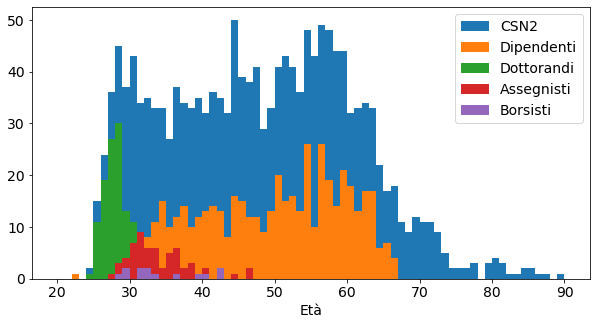

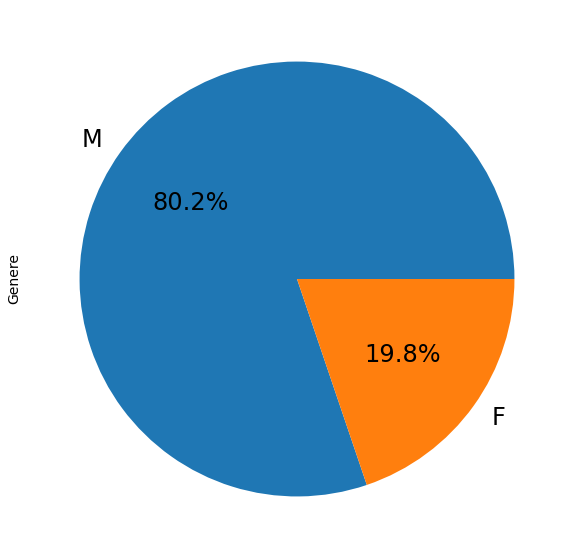

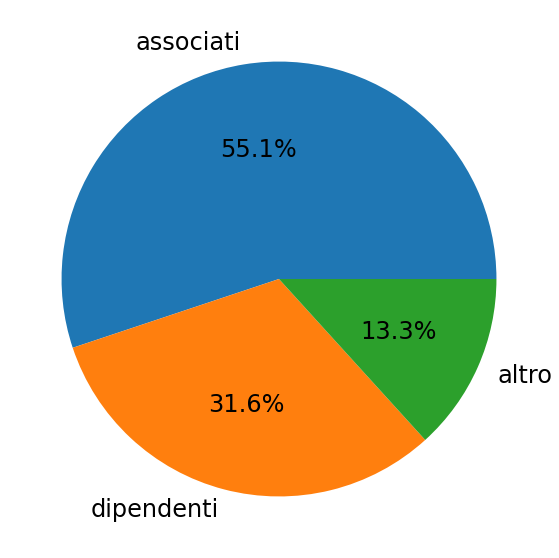

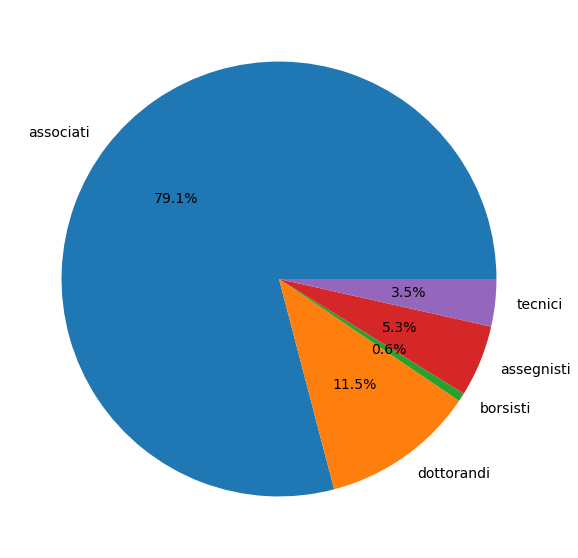

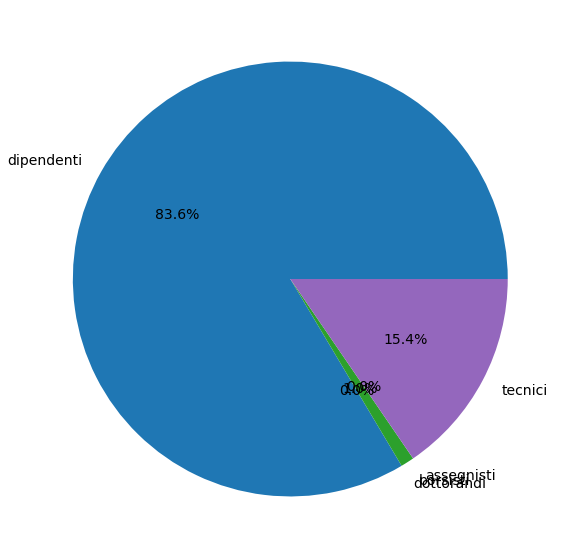

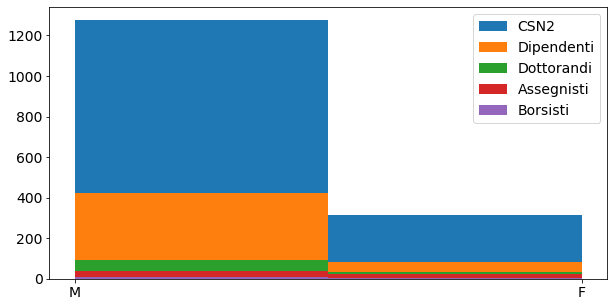

In [13]:
plt.figure(figsize = (10,5))
plt.hist(CSN2["Eta'"], label='CSN2', bins=70, range=(20,90))
plt.hist(dipendenti["Eta'"], label='Dipendenti', bins=70, range=(20,90))
plt.hist(a_dottorandi["Eta'"], label='Dottorandi', bins=70, range=(20,90))
plt.hist(np.concatenate((a_assegnisti["Eta'"], d_assegnisti["Eta'"])), label='Assegnisti', bins=70, range=(20,90))
plt.hist(np.concatenate((a_borsisti["Eta'"], d_borsisti["Eta'"])), label='Borsisti', bins=70, range=(20,90))
#plt.hist(np.concatenate((a_tecnici["Eta'"], d_tecnici["Eta'"])), label='Tecnici TD', bins=70, range=(20,90))

#plt.yscale('log')
plt.xlabel('Età')
plt.legend()
plt.show()
plt.figure(figsize = (10,10))
CSN2.Genere.value_counts().plot.pie(autopct='%1.1f%%', textprops={'fontsize': 24})
plt.show()
plt.figure(figsize = (10,10))
who = [len(associati), len(dipendenti), len(altro)]
who_labels = [ 'associati', 'dipendenti', 'altro']
plt.pie(who, labels = who_labels, autopct='%1.1f%%', textprops={'fontsize': 24})
plt.show()
plt.figure(figsize = (10,10))
who = [len(associati), len(a_dottorandi), len(a_borsisti), len(a_assegnisti), len(a_tecnici)]
who_labels = [ 'associati', 'dottorandi', 'borsisti', 'assegnisti', 'tecnici']
plt.pie(who, labels = who_labels, autopct='%1.1f%%', )
plt.show()
plt.figure(figsize = (10,10))

who = [len(dipendenti), len(d_dottorandi), len(d_borsisti), len(d_assegnisti), len(d_tecnici)]
who_labels = ['dipendenti','dottorandi', 'borsisti', 'assegnisti', 'tecnici']
plt.pie(who, labels = who_labels, autopct='%1.1f%%')
plt.show()

plt.figure(figsize = (10,5))
plt.hist(CSN2.Genere, label='CSN2', bins=2)
plt.hist(dipendenti.Genere, label='Dipendenti', bins=2)
plt.hist(a_dottorandi.Genere, label='Dottorandi', bins=2)
plt.hist(np.concatenate((a_assegnisti.Genere, d_assegnisti.Genere)), label='Assegnisti', bins=2)
plt.hist(np.concatenate((a_borsisti.Genere, d_borsisti.Genere)), label='Borsisti', bins=2)
#plt.yscale('log')
plt.legend()
plt.show()

In [14]:
I_dipendenti   = pd.DataFrame(columns = INFN.columns)
I_d_dottorandi = pd.DataFrame(columns = INFN.columns) 
I_d_borsisti   = pd.DataFrame(columns = INFN.columns) 
I_d_assegnisti = pd.DataFrame(columns = INFN.columns) 
I_d_tecnici    = pd.DataFrame(columns = INFN.columns) 
I_associati    = pd.DataFrame(columns = INFN.columns) 
I_a_dottorandi = pd.DataFrame(columns = INFN.columns) 
I_a_borsisti   = pd.DataFrame(columns = INFN.columns) 
I_a_assegnisti = pd.DataFrame(columns = INFN.columns) 
I_a_tecnici    = pd.DataFrame(columns = INFN.columns) 
I_altro        = pd.DataFrame(columns = INFN.columns)
for i, contratto in enumerate(INFN.Contratti):
  if contratto == '' and not (contratto.find('Dipendente')>=0 or contratto.find('Associato')>=0):
    I_altro = I_altro.append(INFN.iloc[i], ignore_index=True)
  if contratto.find('Dipendente')>=0:
    I_dipendenti = I_dipendenti.append(INFN.iloc[i], ignore_index=True)
    if contratto.find('Dottorando')>=0:
      I_d_dottorandi = I_d_dottorandi.append(INFN.iloc[i], ignore_index=True)
    if contratto.find('Borsista')>=0:
      I_d_borsisti = I_d_borsisti.append(INFN.iloc[i], ignore_index=True)
    if contratto.find('Assegnista')>=0:
      I_d_assegnisti = I_d_assegnisti.append(INFN.iloc[i], ignore_index=True)
    if contratto.find('Tecnico')>=0:
      I_d_tecnici = I_d_tecnici.append(INFN.iloc[i], ignore_index=True)

  if contratto.find('Associato')>=0:
    I_associati = I_associati.append(INFN.iloc[i], ignore_index=True)
    if contratto.find('Dottorando')>=0:
      I_a_dottorandi = I_a_dottorandi.append(INFN.iloc[i], ignore_index=True)
    if contratto.find('Borsista')>=0:
      I_a_borsisti = I_a_borsisti.append(INFN.iloc[i], ignore_index=True)
    if contratto.find('Assegnista')>=0:
      I_a_assegnisti = I_a_assegnisti.append(INFN.iloc[i], ignore_index=True)
    if contratto.find('Tecnico')>=0:
      I_a_tecnici = I_a_tecnici.append(INFN.iloc[i], ignore_index=True)

print ('Popolazione: ', len(INFN),'\n',
       'I_dipendenti: ', len(I_dipendenti), len(I_d_dottorandi), len(I_d_borsisti), len(I_d_assegnisti), len(I_d_tecnici), '\n',
       'I_associati: ', len(I_associati), len(I_a_dottorandi), len(I_a_borsisti), len(I_a_assegnisti), len(I_a_tecnici), '\n',
       'I_Altro: ', len(I_altro))

Popolazione:  5394 
 I_dipendenti:  1572 2 56 0 248 
 I_associati:  3039 625 25 231 118 
 I_Altro:  785


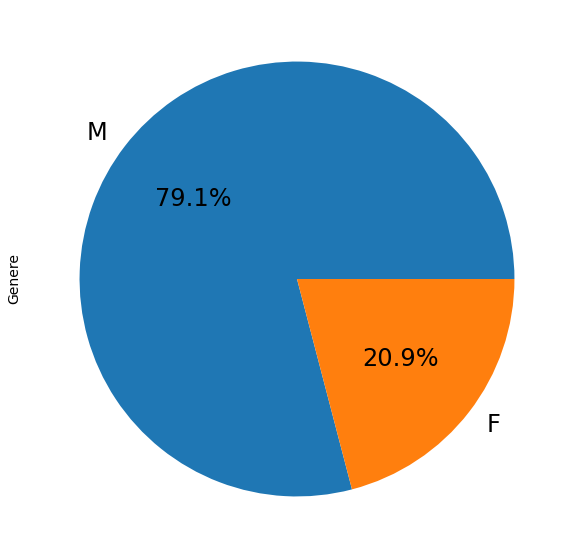

In [15]:
# plt.figure(figsize = (10,5))
# plt.hist(INFN["Eta'"], label='INFN', bins=70, range=(20,90))
# plt.hist(I_dipendenti["Eta'"], label='I_dipendenti', bins=70, range=(20,90))
# plt.hist(I_a_dottorandi["Eta'"], label='Dottorandi', bins=70, range=(20,90))
# plt.hist(np.concatenate((I_a_assegnisti["Eta'"], I_d_assegnisti["Eta'"])), label='Assegnisti', bins=70, range=(20,90))
# plt.hist(np.concatenate((I_a_borsisti["Eta'"], I_d_borsisti["Eta'"])), label='Borsisti', bins=70, range=(20,90))
# #plt.hist(np.concatenate((I_a_tecnici["Eta'"], I_d_tecnici["Eta'"])), label='Tecnici TD', bins=70, range=(20,90))

# #plt.yscale('log')
# plt.xlabel('Età')
# plt.legend()
# plt.show()
plt.figure(figsize = (10,10))
INFN.Genere.value_counts().plot.pie(autopct='%1.1f%%', textprops={'fontsize': 24})
plt.show()

Fondi Esterni, progetti e persone

In [21]:
import time
fe_attivi = pd.DataFrame(columns = FE_INFN.columns)
for i, fe_end in enumerate(FE_INFN['AL']):
  if time.strptime(fe_end, "%d/%m/%y") > time.strptime('31/12/20', "%d/%m/%y"):
    fe_attivi = fe_attivi.append(FE_INFN.iloc[i], ignore_index=True)



In [22]:
fe_attivi[fe_attivi['CNS']==7]

,PROGETTO,CNS,DAL,AL,PROROGA,GRANT INFN,TOTALE BUDGET,PROJECT GRANT TOTALE
43,UE-C_SCALE,7,01/01/21,30/06/23,,,,
44,PON-CA_2020,7,01/09/15,31/12/21,,,,
45,PON-CAGLIARI_2020,7,01/01/18,01/01/30,,1'302'000.00,,
46,PON-CAGLIARI_2020FO,7,01/06/19,30/09/21,,196'500.00,,
61,PON-CNRBIOMICS_PON,7,,30/06/21,,604'571.00,,
72,POR-DIONCOGEN,7,11/12/19,10/06/22,,,,
83,UE-EOSC_PILLAR,7,01/07/19,30/06/22,,532'500.00,6'880'965.00,6'880'965.00
93,UE-ESCAPE,7,01/02/19,31/07/22,,885'077.50,15'983'301.25,15'983'301.25
106,UE-EXSCALATE4COV,7,01/04/20,30/09/21,,41'250.00,2'970'875.00,2'970'875.00
132,UE-HARMONY,7,01/10/17,31/12/21,,356'499.16,20'200'000.00,42'205'587.60


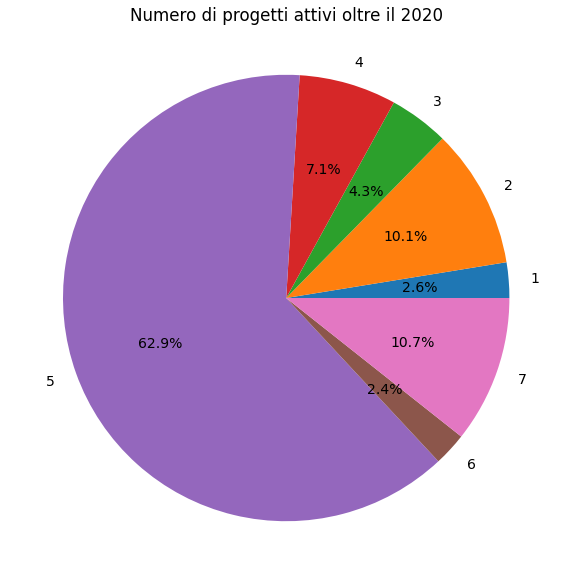

In [23]:
plt.figure(figsize = (10,10))
sums = fe_attivi['CNS'].groupby(fe_attivi['CNS']).sum()
plt.axis('equal');
plt.pie(sums, labels=sums.index,  autopct='%1.1f%%');
plt.title("Numero di progetti attivi oltre il 2020")
plt.show()

In [24]:
# cerca tutte le persone in vari progetti
CSN2[CSN2["Esperimenti"].str.contains("INITUM|CYGNO")]

,Cognome,Nome,Eta',Genere,Contratti,Esperimenti,Finanziamenti Contratto
80,Baracchini,Elisabetta,38,F,(01/01/2020 - 31/12/2020) Associato Incarico d...,20% - (LNGS:CSN2) CYGNO (Ricercatore)\n 0% - ...,
106,Bedogni,Roberto,46,M,(07/01/2014 - nessuna scad.) Dipendente Ricerc...,5% - (LNF:CSN2) CYGNO (Ricercatore),
123,Benussi,Luigi,53,M,(01/02/2010 - nessuna scad.) Dipendente Ricerc...,20% - (LNF:CSN2) CYGNO (Ricercatore),
149,Bianco,Stefano,59,M,(01/03/1992 - nessuna scad.) Dipendente Primo ...,20% - (LNF:CSN2) CYGNO (Ricercatore),
250,Capoccia,Cesidio,56,M,(01/07/1994 - nessuna scad.) Dipendente Collab...,30% - (LNF:CSN2) CYGNO (Tecnico),
253,Caponero,Michele Arturo,59,M,(01/01/2020 - 31/12/2020) Associato Scientific...,20% - (LNF:CSN2) CYGNO (Ricercatore),
308,Cavoto,Gianluca,47,M,(19/03/2020 - 31/12/2020) Associato Incarico d...,30% - (ROMA1:CSN2) CYGNO (Ricercatore)\n 0% -...,
422,D'Imperio,Giulia,32,F,(02/09/2019 - nessuna scad.) Dipendente Ricerc...,50% - (ROMA1:CSN2) CYGNO (Ricercatore)\n 50% ...,
514,Di Marco,Emanuele,41,M,(01/04/2015 - nessuna scad.) Dipendente Ricerc...,10% - (ROMA1:CSN2) CYGNO (Ricercatore)\n 10% ...,
742,Iacoangeli,Francesco,43,M,(01/10/2018 - nessuna scad.) Dipendente Tecnol...,30% - (ROMA1:CSN2) CYGNO (Tecnologo),


In [27]:
# progetti attivi in CSN2
np.array(fe_attivi[fe_attivi['CNS']==2].PROGETTO)

array(['PRIN-2015L33WAK_002', 'ALTRO-ADAM', 'UE-AHEAD2020',
       'ALTRO-AMS_02_19', 'ALTRO-AMS_E2_035', 'ALTRO-ARIA',
       'ALTRO-ASI_AMS', 'ALTRO-ASI_I_APS', 'ALTRO-ASI_INAF_EG',
       'ALTRO-ASI_INAF_FLUCHE', 'UE-ASPERA_2_235489', 'ALTRO-AUGERNEXT',
       'ALTRO-BOREXINO_CF', 'ALTRO-BOREXINO_CF_PFE', 'UE-CALDER',
       'ALTRO-CIR01_00018_IPA', 'ALTRO-CIR01_00020_FAR',
       'ALTRO-CIR01_00021_PAC', 'ALTRO-COSMOTRIG', 'UE-DARKWAVE',
       'ALTRO-DARWIN', 'UE-ENUBET', 'UE-ERN_APULIA', 'UE-ERN_APULIA2',
       'ALTRO-ESONET_TEST_EXP', 'UE-ESSNUSB', 'ALTRO-EUCLID_FASE_D',
       'ALTRO-EXTP', 'PON-FARO2030_PON', 'ALTRO-GAMMARAD',
       'ALTRO-GAPS_ASI', 'ALTRO-GERDA_CF', 'UE-HOLMES_340321',
       'POR-IDMAR', 'POR-IDMAR_PO_FESR', 'ALTRO-IDMAR_PO_FESR',
       'ALTRO-ILIAS', 'POR-INFN_RT2', 'ALTRO-INGV_PORTO', 'UE-INITIUM',
       'PON-IPANEMA_PON', 'ALTRO-ISOTTA', 'ALTRO-IXPE', 'ALTRO-LIMADOU_2',
       'UE-MEGANTE', 'ALTRO-NUTECH', 'ALTRO-OPERA_CF', 'PON-PACK_PON',
       'AL

In [28]:
CSN2[CSN2.Esperimenti.str.contains('LIMADOU')]

,Cognome,Nome,Eta',Genere,Contratti,Esperimenti,Finanziamenti Contratto
57,Assante,Dario,41,M,,60% - (LNF:CSN2) LIMADOU_CSN2 (Ricercatore)\n ...,
65,Badoni,Davide,60,M,(02/05/1985 - nessuna scad.) Dipendente Tecnol...,50% - (ROMA2:CSN2) LIMADOU_CSN2 (Tecnologo),
89,Bartocci,Simona,39,F,(04/06/2020 - 03/06/2021) Dipendente Collabora...,100% - (ROMA2:CSN2) LIMADOU_CSN2 (Ricercatore),LIMADOU 2 (04-06-2020 / 03-06-2021)
102,Battiston,Roberto,64,M,(01/01/2020 - 31/12/2020) Associato Incarico d...,40% - (TIFP:CSN2) AMS2 (Ricercatore)\n 30% - ...,
122,Benotto,Franco,51,M,(16/11/1988 - nessuna scad.) Dipendente Collab...,44% - (TO:CSN2) LIMADOU_CSN2 (Tecnico),
...,...,...,...,...,...,...,...
1422,Sparvoli,Roberta,50,F,(01/01/2020 - 31/12/2020) Associato Incarico d...,30% - (ROMA2:CSN2) GAPS (Ricercatore)\n 60% -...,
1423,Spataro,Bruno,73,M,(01/01/2020 - 31/12/2020) Associato Incarico d...,0% - (LNF:CSN2) LIMADOU_CSN2 (Ricercatore),
1494,Tosi,Paolo,64,M,(01/01/2020 - 31/12/2020) Associato Scientific...,30% - (TIFP:CSN2) LIMADOU_CSN2 (Ricercatore),
1560,Vitale,Vincenzo,46,M,(01/10/2018 - nessuna scad.) Dipendente Ricerc...,5% - (ROMA2:CSN2) AHEAD2020 (Ricercatore)\n 7...,


In [36]:
fe_attivi[fe_attivi['CNS']==2].PROGETTO

0      PRIN-2015L33WAK_002
3               ALTRO-ADAM
5             UE-AHEAD2020
7          ALTRO-AMS_02_19
8         ALTRO-AMS_E2_035
              ...         
262         ALTRO-QUBIC_FE
295          UE-SUPERGALAX
301            ALTRO-TENMA
309       ALTRO-VIRGO_MIUR
312    ALTRO-VST_INAF_GR_2
Name: PROGETTO, Length: 63, dtype: object

In [43]:
# cerca tutte le persone con progetti attivi in CSN2 e crea il DB
fe_people = pd.DataFrame(columns=CSN2.columns)
for i, progetto in enumerate(fe_attivi[fe_attivi['CNS']==2].PROGETTO):
    fe_people = fe_people.append(CSN2[CSN2.Esperimenti.str.contains(progetto)])
fe_people

,Cognome,Nome,Eta',Genere,Contratti,Esperimenti,Finanziamenti Contratto


In [39]:
# ipotizando un progetto esterno per persona agginge le colonne nome del progetto e percentuale sul FE
fe_attivita = np.empty((len(fe_people)), dtype=object)
fe_pp =  np.empty((len(fe_people)), dtype=object)
for i, esperimenti in enumerate(fe_people.Esperimenti):
  for j, fe_progetto in enumerate(fe_attivi[fe_attivi['Research line']==2].Project):
    if esperimenti.find(fe_progetto)>=0:
      esp_arr = esperimenti.split('\n')   
      for k in range(len(esp_arr)):
        if esp_arr[k].find(fe_progetto)>=0:
          fe_pp[i] = np.int(esp_arr[k].split('%')[0])
          fe_attivita[i] = fe_progetto
fe_people['fe_progetto'] = fe_attivita
fe_people['fe_perc'] = fe_pp

Tottle FTE su FE:  0.0


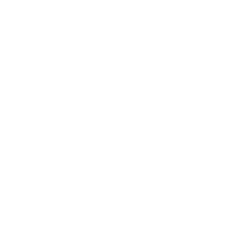

In [40]:
print ('Tottle FTE su FE: ', fe_people.fe_perc.sum()/100)
fe_density = fe_people['fe_perc'].groupby(fe_people['fe_progetto']).sum()/100
plt.pie(fe_density)
plt.show()

In [41]:
fe_density

Series([], Name: fe_perc, dtype: float64)

In [42]:
np.array(fe_people.fe_progetto)

array([], dtype=object)